In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src
! ls

Mounted at /content/gdrive
/content/gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src
01-parse_data_bgl.py  feature_importance_example.py  hdfsparser.py  models
bgl.ipynb	      feature_importance.ipynb	     __init__.py    __pycache__
converter.ipynb       feature_importance.py	     logrep	    splitdatabgl.ipynb
extensions	      hdfs.ipynb		     main.py	    splitdatabgl.py


In [ ]:
from models.traditional import SVM
from models.traditional import DecisionTree
from models.traditional import LR
from extensions.stat_ranking import ModelData
from splitdatabgl import split_bgl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance

In [ ]:
data = np.load('../data/BGL/BGL-log.splitted.npz')
train_x = data['x_train']
train_y = data['y_train']
test_x = data['x_test']
test_y = data['y_test']

In [ ]:
event_ids = pd.read_csv('../data/BGL/BGL.event_ids.csv')
event_ids = event_ids.drop(event_ids.columns[0], axis=1)
feature_names = event_ids.to_numpy().flatten()

In [ ]:
decision_tree = DecisionTree()
decision_tree.fit(train_x, train_y)

====== Model summary ======


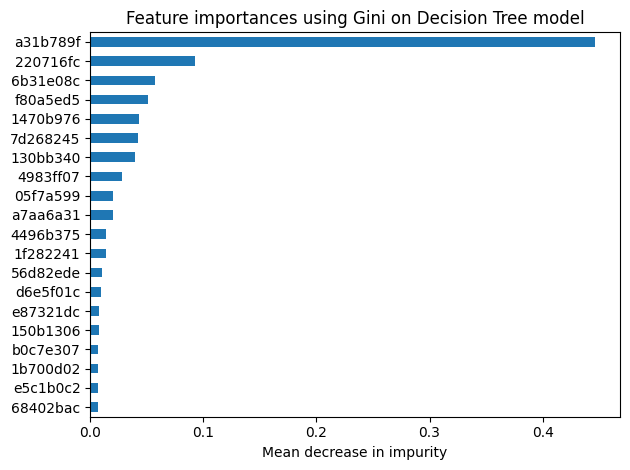

In [ ]:
mdi_importances = pd.Series(
    decision_tree.classifier.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax1 = mdi_importances.tail(20).plot.barh()
ax1.set_title("Feature importances using Gini on Decision Tree model")
ax1.set_xlabel("Mean decrease in impurity") # changed ylabel to xlabel
ax1.figure.tight_layout()

In [ ]:
print(mdi_importances.tail(20))

In [ ]:
#result = permutation_importance(
#    decision_tree.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
#)

#permutation_importances = pd.Series(result.importances_mean).sort_values(ascending=True).tail(20)

#fig, ax = plt.subplots()
#permutation_importances.plot.bar(yerr=result.importances_std, ax=ax)
#ax.set_title("Feature importances using permutation on full model")
#ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
#plt.show()

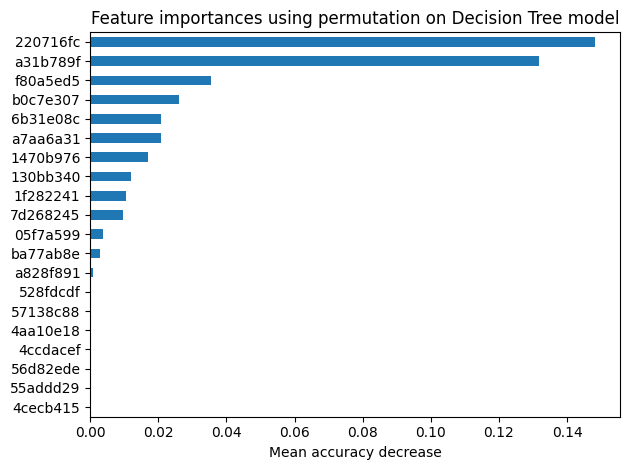

In [ ]:
result = permutation_importance(
    decision_tree.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.barh()
ax2.set_title("Feature importances using permutation on Decision Tree model")
ax2.set_xlabel("Mean accuracy decrease") # changed ylabel to xlabel
ax2.figure.tight_layout()

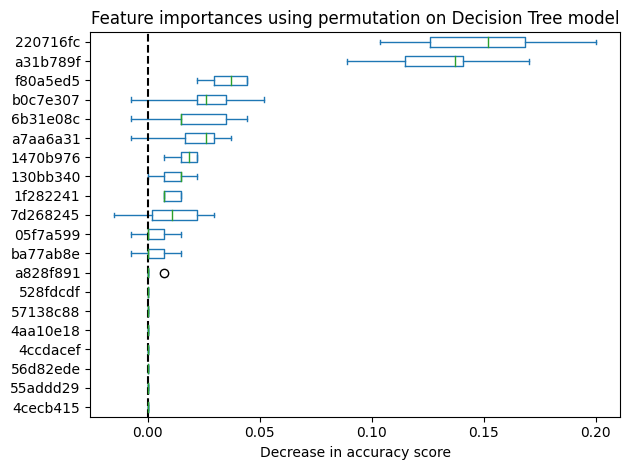

In [40]:
sorted_importances_idx = result.importances_mean.argsort()
importances_last_20 = sorted_importances_idx[-20:]
importances = pd.DataFrame(
    result.importances[importances_last_20].T,
    columns=permutation_importances.index,
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Feature importances using permutation on Decision Tree model")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
lr = LR()
lr.fit(train_x, train_y)

====== Model summary ======


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
mdi_importances = pd.Series(
    lr.classifier.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax1 = mdi_importances.tail(20).plot.barh()
ax1.set_title("Feature importances using Gini on LR model")
ax1.set_xlabel("Mean decrease in importance") # changed ylabel to xlabel
ax1.figure.tight_layout()

AttributeError: ignored

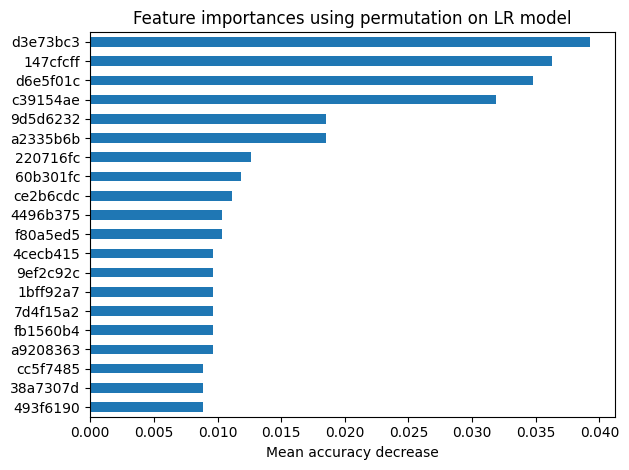

In [ ]:
result = permutation_importance(
    lr.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.barh()
ax2.set_title("Feature importances using permutation on LR model")
ax2.set_xlabel("Mean accuracy decrease") # changed ylabel to xlabel
ax2.figure.tight_layout()

In [ ]:
svm = SVM(train_x, train_y, test_x, test_y)

In [ ]:
mdi_importances = pd.Series(
    svm.classifier.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax1 = mdi_importances.tail(20).plot.barh()
ax1.set_title("Feature importances using Gini on SVM model")
ax1.set_xlabel("Mean decrease in importance") # changed ylabel to xlabel
ax1.figure.tight_layout()

AttributeError: ignored

In [ ]:
result = permutation_importance(
    svm.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.barh()
ax2.set_title("Feature importances using permutation on SVM model")
ax2.set_xlabel("Mean accuracy decrease") # changed ylabel to xlabel
ax2.figure.tight_layout()